# Global terror activation

We do this by accessing Kaggle data. The **Global Terrorism Database (GTD)** is an open-source database including information on terrorist attacks around the world from 1970 through 2017. We can get the data directly from the official website of GTD.https://start.umd.edu/gtd/

In [5]:
pip install pyproj

     |████████████████████████████████| 11.0MB 1.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import io
import base64
from IPython.display import HTML, display
import warnings
import codecs
from subprocess import check_output

## Data Import

In [3]:
# Import the data we downloaded
terror=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Preprocessing

In [4]:

terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [37]:
#terror.to_csv('globalterrorismdb_0718dist_clean.csv')

In [5]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [6]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


## Data visualization

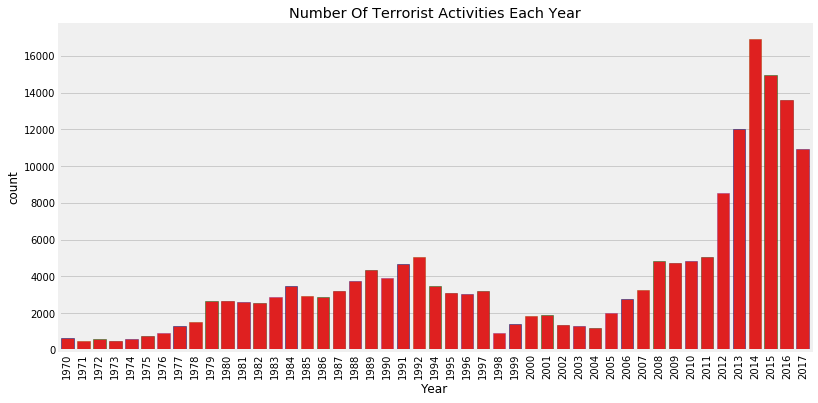

In [25]:
# The overall tour
plt.subplots(figsize=(12,6))
sns.countplot('Year',data=terror,color='r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

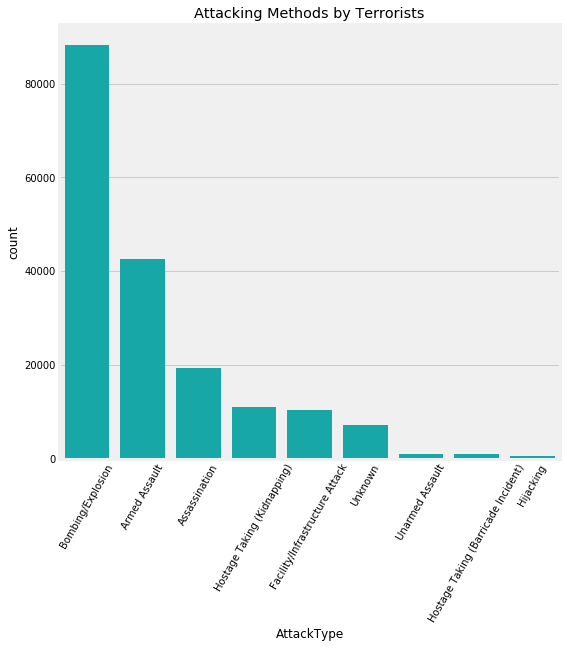

In [24]:
# attacking methods
plt.subplots(figsize=(8,8))
sns.countplot('AttackType',data=terror,color ='c',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Attacking Methods by Terrorists')
plt.show()

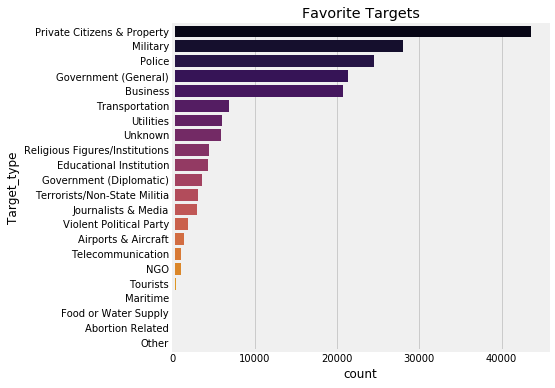

In [17]:
# Global Targets
plt.subplots(figsize =(6,6))
sns.countplot(y = terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.yticks(rotation=0)
plt.title('Favorite Targets')
plt.show()

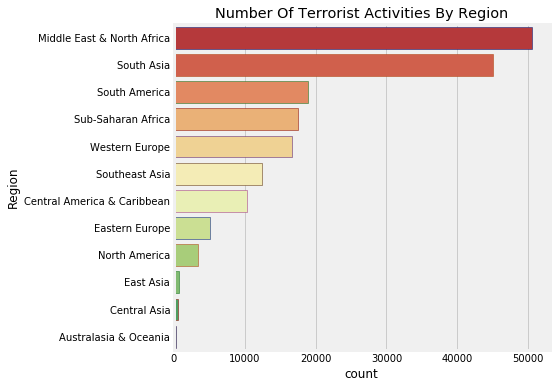

In [16]:
# Hot Region
plt.subplots(figsize=(6,6))
sns.countplot(y ='Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.yticks(rotation=0)
plt.title('Number Of Terrorist Activities By Region')

plt.show()

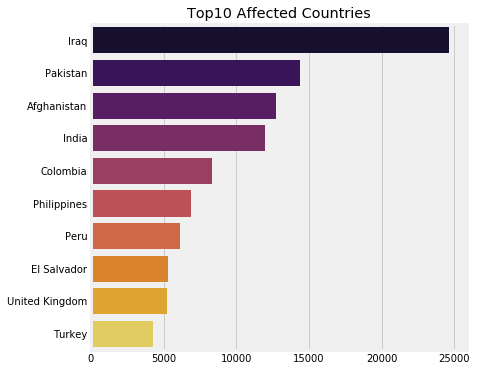

In [14]:
# Top terror activation countries
plt.subplots(figsize=(6,6))
sns.barplot(y = terror['Country'].value_counts()[:10].index,
            x = terror['Country'].value_counts()[:10].values,palette='inferno')
plt.title('Top10 Affected Countries')
plt.show()

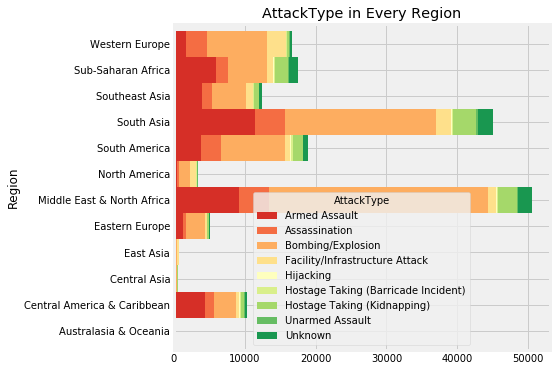

In [15]:
# Combine with Region and attack type
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('AttackType in Every Region')
plt.show()

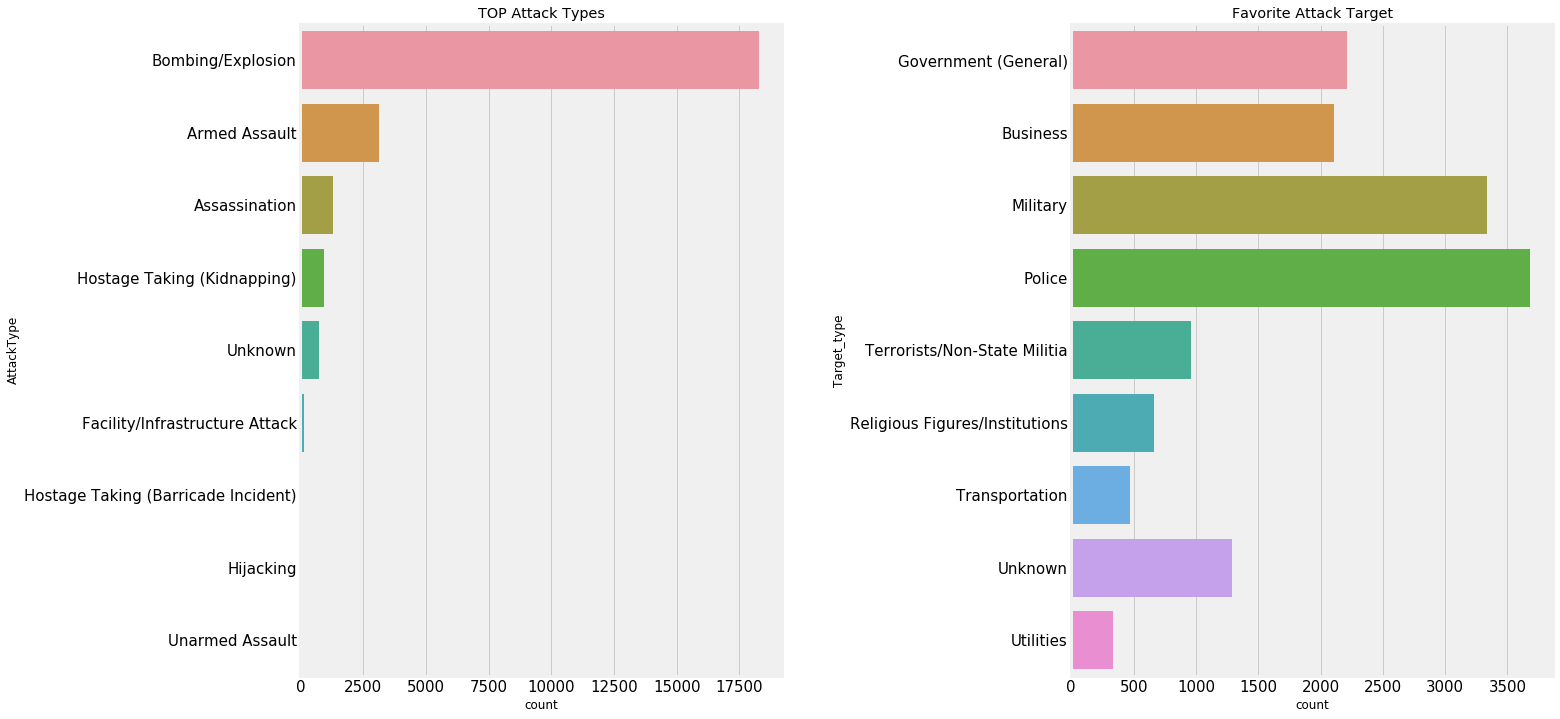

In [49]:
# Case：Iraq，the top country
terror_iraq=terror[terror['Country']=='Iraq']

f,ax=plt.subplots(1,2,figsize=(20,12))

sns.countplot(y='AttackType',data=terror_iraq,ax=ax[0], order = terror_iraq['AttackType'].value_counts().index )
ax[0].set_title('TOP Attack Types')

iraq_targets = terror_iraq['Target_type'].value_counts()[1:10].index
iraq_targets = terror_iraq[terror_iraq['Target_type'].isin(iraq_targets)]
sns.countplot(y='Target_type',data = iraq_targets,ax=ax[1])
ax[1].set_title('Favorite Attack Target')

plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()